In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


### Checking the train.csv file 

In [2]:
import pandas as pd

path = '/content/drive/My Drive/Colab Notebooks/tails-and-whales_dataset/train_sample_500/'
data_sample = pd.read_csv(path+'train_data_sample.csv')
data_sample

,image,species,individual_id,speciesv2
0,6683d80c1959e3.jpg,bottlenose_dolphin,4b8534134eb8,dolphin
1,2238b609533863.jpg,gray_whale,80d282ac5d45,whale
2,d6c5ca6001c910.jpg,beluga,617368452785,beluga
3,8cb9be04270854.jpg,dusky_dolphin,0eb252b85dc0,dolphin
4,2f5923f7aa8f37.jpg,blue_whale,e82a1c06b910,whale
...,...,...,...,...
495,a57d922da74d3e.jpg,humpback_whale,b2a4a87ffb86,whale
496,32d6b705eab7b5.jpg,humpback_whale,03c879f7c6d5,whale
497,7921becb3753c5.jpg,gray_whale,20312a4e3881,whale
498,199e168b341d48.jpg,spinner_dolphin,33f106fc9744,dolphin


### Load data images from local repo

In [ ]:
#! pip install opencv-python

In [3]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2

In [4]:
images_list = list(data_sample['image'])
len(images_list)

500

In [5]:
# This block code includes a resizing step

path = "/content/drive/My Drive/Colab Notebooks/tails-and-whales_dataset/train_sample_500/train_sample_image/"
loaded_images = []
for image in images_list[:500]:   ### change this value for a subsample only ###
    
    img = mpimg.imread(path + image)
    img = cv2.resize(img, dsize=(256, 256), interpolation= cv2.INTER_LINEAR) ### select resizing here ###
    loaded_images.append(np.array(img))

In [6]:
print(type(loaded_images))
print(len(loaded_images))

<class 'list'>
500


In [7]:
loaded_images[3].shape

(256, 256, 3)

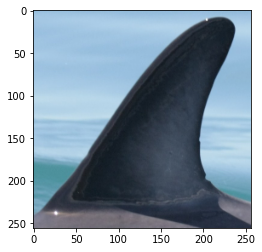

In [8]:
#Image was re-sized 256,256
plt.imshow(loaded_images[3], cmap='gray') ### modify the index to show another image ###

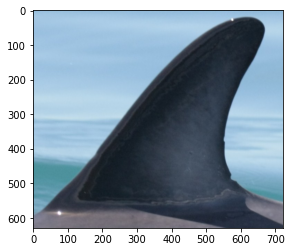

In [9]:
#Same image before re-sizing
link = path+images_list[3] ### modify the index to show another image ###
previous_image = mpimg.imread(link)
plt.imshow(previous_image, cmap='gray')

### Making sure all the images are in RGB format

In [10]:
# Code a function which will detect the index of B&W images
list_index_bw = []
list_len = []
for index,img in enumerate(loaded_images):
    if len(img.shape) != 3:
        list_index_bw.append(index)
        list_len.append(len(img.shape))

In [11]:
list_index_bw

[7, 9, 23, 83, 99, 124, 188, 191, 212, 219, 263, 323, 337, 424, 483, 489]

In [12]:
list_len

[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]

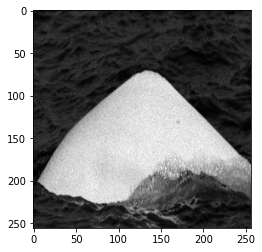

In [13]:
#Image in greyscale format
plt.imshow(loaded_images[7], cmap='gray')  ### modify the index to show another image ###

In [14]:
# Shape of B&W image
loaded_images[7].shape ### modify the index to select another image ###

(256, 256)

In [15]:
# How many images are in B&W?
len(list_index_bw)

16

In [16]:
#Code a function which will convert B&W image into RGB image
for i in list_index_bw:
    loaded_images[i] = np.stack((loaded_images[i],)*3, axis=-1)

In [17]:
# Shape of RGB-newly converted image
loaded_images[7].shape

(256, 256, 3)

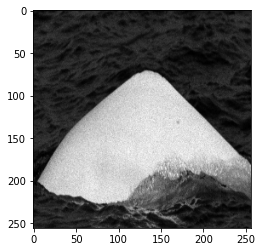

In [18]:
#Same image in RGB format
plt.imshow(loaded_images[7], cmap='gray')

### Defining X

In [19]:
# Conver the list of images into a np ndarray
X = np.array(loaded_images)

In [20]:
X.shape

(500, 256, 256, 3)

### Defining y

In [21]:
#Add a new column 'class' on data_sample df

classes = {'whale':0, 'dolphin':1, 'beluga':2}
data_sample['class'] = data_sample['speciesv2'].map(classes)
data_sample

,image,species,individual_id,speciesv2,class
0,6683d80c1959e3.jpg,bottlenose_dolphin,4b8534134eb8,dolphin,1
1,2238b609533863.jpg,gray_whale,80d282ac5d45,whale,0
2,d6c5ca6001c910.jpg,beluga,617368452785,beluga,2
3,8cb9be04270854.jpg,dusky_dolphin,0eb252b85dc0,dolphin,1
4,2f5923f7aa8f37.jpg,blue_whale,e82a1c06b910,whale,0
...,...,...,...,...,...
495,a57d922da74d3e.jpg,humpback_whale,b2a4a87ffb86,whale,0
496,32d6b705eab7b5.jpg,humpback_whale,03c879f7c6d5,whale,0
497,7921becb3753c5.jpg,gray_whale,20312a4e3881,whale,0
498,199e168b341d48.jpg,spinner_dolphin,33f106fc9744,dolphin,1


In [22]:
# Encoding class in categories
from tensorflow.keras.utils import to_categorical

num_classes = 3
y = to_categorical(data_sample['class'])
len(y)

500

### Train/Val/Test split

In [23]:
# Use the following method to create X_train, y_train, X_val, y_val, X_test, y_test

first_split = int(len(loaded_images) /6.)
second_split = first_split + int(len(loaded_images) * 0.2)
X_test, X_val, X_train = X[:first_split], X[first_split:second_split], X[second_split:]
y_test, y_val, y_train = y[:first_split], y[first_split:second_split], y[second_split:]

In [24]:
print (len(X_test), len(X_val), len(X_train))

83 100 317


In [25]:
(len(X_test), len(X_val), len(X_train)) == (len(y_test), len(y_val), len(y_train))

True

### A CNN architecture, using a pre-trained CNN = Transfer learning

In [26]:
X_train[0].shape

(256, 256, 3)

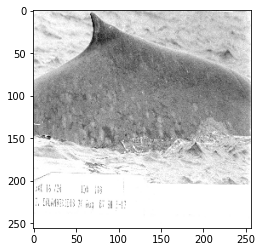

In [27]:
plt.imshow(X_train[0], cmap='gray')

In [ ]:
### A choisir entre les modèles pré-entrainés suivants: 
### VGG16 ###  ### ResNet101 ###  ### MobileNet V2 ###

In [28]:
from tensorflow.keras.applications.vgg16 import VGG16 #vgg16
from tensorflow.keras.applications.resnet import ResNet101 #resnet101
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2 #mobilenetv2

# Important note about BatchNormalization layers (for MobileNetV2) !! 

def load_model(pretrained_model = 'vgg16'):
    
    if pretrained_model == 'vgg16':
      model = VGG16(weights="imagenet", include_top=False, input_shape=X_train[0].shape)
    
    if pretrained_model == 'resnet101':
      model = ResNet101(weights="imagenet", include_top=False, input_shape=X_train[0].shape)

    if pretrained_model == 'mobilenetv2':
      model = MobileNetV2(weights="imagenet", include_top=False, input_shape=X_train[0].shape)
    
    return model

**Look at the architecture of the model using .summary()**

In [29]:
model = load_model() #vgg16(default), resnet101, mobilenetv2
model.summary()

58900480/58889256 [==============================] - 0s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                              

💪 Impressive, right? Two things to notice:
- It ends with a combo Conv2D/MaxPooling2D 
- The `layers.Flatten` and the `layers.Dense` are not here yet, we need to add them.
- There are more than 14.000.000 parameters, which is a lot... 
    - We could fine-tune them, i.e. update them as we will update the weights of the dense layers, but it will take a lot of time....
    - For this reason, we will inform the model that the layers until the flattening will be set non-trainable.

**Deactivating the training of the VGG16 paramters** 

* Write a first function which:
    - takes the previous model as the input
    - sets the first layers to be non-trainable, by applying **`model.trainable = False`**
    - returns the model.

* Then inspect the summary of the model to check that the parameters are no longer trainable, they were set to be  **`non-trainable`**.

In [30]:
### Feature extraction: Freeze the convolutional base
def set_nontrainable_layers(model):
    
    # Set the first layers to be untrainable
    model.trainable = False
    
    return model

In [31]:
model = set_nontrainable_layers(model)
model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 64, 64, 128)       0     

**Chaining the pretrained convolutional layers of VGG16 with our own dense layers**

We will write a function that adds flattening and dense layers after the convolutional layers. 

In [32]:
from tensorflow.keras import layers, models

def add_last_layers(model):
    '''Take a pre-trained model, set its parameters as non-trainables, and add additional trainable layers on top'''
    # $CHALLENGIFY_BEGIN
    base_model = set_nontrainable_layers(model)
    flatten_layer = layers.Flatten() ### modify this if necessary
    dense_layer = layers.Dense(500, activation='relu') ### modify this if necessary
    prediction_layer = layers.Dense(3, activation='softmax') ### modify this if necessary
    
    
    model = models.Sequential([
        base_model,
        flatten_layer,
        dense_layer,
        prediction_layer
    ])
    # $CHALLENGIFY_END
    return model

**Inspect the parameters of a customized VGG16**

In [33]:
model = add_last_layers(model)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 8, 8, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 32768)             0         
                                                                 
 dense (Dense)               (None, 500)               16384500  
                                                                 
 dense_1 (Dense)             (None, 3)                 1503      
                                                                 
Total params: 31,100,691
Trainable params: 16,386,003
Non-trainable params: 14,714,688
_________________________________________________________________


**Building a function that creates a full customized VGG16 and compiles it**

In [ ]:
### code block for a different metric
from keras.metrics import AUC

# use strings for quick access
metric = ['accuracy', 'precision', 'recall']
# use Keras metric objects for fine-tuning
metric_roc = keras.metrics.AUC(num_thresholds = 200, curve='ROC') # or curve='PR'

In [35]:
from tensorflow.keras import optimizers

def build_model():
    # $CHALLENGIFY_BEGIN    
    model = load_model()
    model = add_last_layers(model)
    
    opt = optimizers.Adam(learning_rate=1e-4) #>>> We advise the adam optimizer with learning_rate=1e-4
    model.compile(loss='categorical_crossentropy',
                  optimizer=opt,
                  metrics= ['accuracy'])
    return model
    # $CHALLENGIFY_END

### Back to the data

🚨 The VGG16 model was trained on images which were preprocessed in a specific way. This is the reason why we did _NOT_ normalize them earlier.

Apply the specific processing to the original (non-normalized) images here using the method **`preprocess_input`** that you can import from **`tensorflow.keras.applications.vgg16`**

📚 Cf. [documentation](https://www.tensorflow.org/api_docs/python/tf/keras/applications/vgg16/preprocess_input)

In [36]:
from tensorflow.keras.applications.vgg16 import preprocess_input
# add the preprocess_input of the other models

In [37]:
X_train = preprocess_input(X_train) 
X_val = preprocess_input(X_val)
X_test = preprocess_input(X_test)

In [ ]:
### Check 'normalized' data
# X_train[1]

### Fit the model

**Training the customized VGG16**

* Train the model with an Early stopping criterion on the validation accuracy -
* Since the validation data are provided, therefore use `validation_data` instead of `validation_split`.

In [38]:
from tensorflow.keras.callbacks import EarlyStopping

model = build_model()

es = EarlyStopping(monitor = 'val_loss', #>>> we can change this! 
                   mode = 'auto', #>>> depends on what is being monitored!
                   patience = 5, 
                   verbose = 1, 
                   restore_best_weights = True)

history = model.fit(X_train, y_train, 
                    validation_data=(X_val, y_val), 
                    epochs=50, 
                    batch_size=16, 
                    callbacks=[es])

Epoch 1/50
20/20 [==============================] - 20s 419ms/step - loss: 6.3110 - accuracy: 0.6088 - val_loss: 2.8322 - val_accuracy: 0.7600
Epoch 2/50
20/20 [==============================] - 5s 246ms/step - loss: 1.0895 - accuracy: 0.9243 - val_loss: 5.9187 - val_accuracy: 0.7700
Epoch 3/50
20/20 [==============================] - 5s 247ms/step - loss: 0.0551 - accuracy: 0.9905 - val_loss: 4.1480 - val_accuracy: 0.7800
Epoch 4/50
20/20 [==============================] - 5s 248ms/step - loss: 6.6093e-05 - accuracy: 1.0000 - val_loss: 4.4160 - val_accuracy: 0.7800
Epoch 5/50
20/20 [==============================] - 5s 248ms/step - loss: 4.0069e-05 - accuracy: 1.0000 - val_loss: 4.4454 - val_accuracy: 0.7800
Epoch 6/50
20/20 [==============================] - 5s 251ms/step - loss: 2.6339e-05 - accuracy: 1.0000 - val_loss: 4.4448 - val_accuracy: 0.7800
Epoch 6: early stopping


### Looking at the history

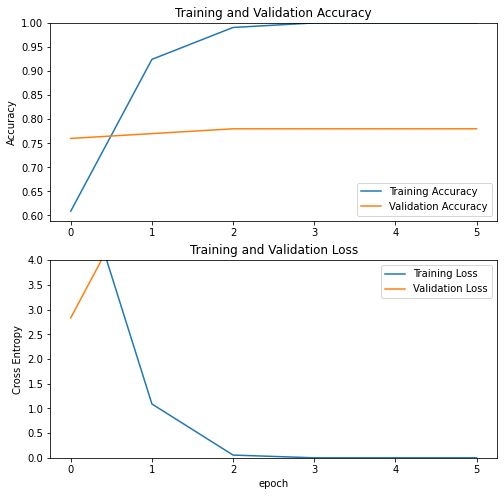

In [39]:
### Learning curves

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,4.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

### Evaluating the model

In [40]:
res_vgg = model.evaluate(X_test, y_test)

test_accuracy_vgg = res_vgg[-1]
print(res_vgg)
print(f"test_accuracy_vgg = {round(test_accuracy_vgg,2)*100} %")

3/3 [==============================] - 9s 2s/step - loss: 1.4876 - accuracy: 0.8434
[1.4875565767288208, 0.8433734774589539]
test_accuracy_vgg = 84.0 %


### Save the model

In [ ]:
### Save the model ##### ALWAYS MODIFY THE NAME BEFORE RUNNING THIS CELL
from tensorflow.keras.models import save_model

model.save('model_1')

INFO:tensorflow:Assets written to: model_1/assets


### Classification report

In [41]:
y_pred = model.predict(X_test, verbose=1)

3/3 [==============================] - 1s 377ms/step


In [42]:
y_test.shape == y_pred.shape

True

In [43]:
### Print the precision and recall, among other metrics
from sklearn.metrics import classification_report

print(classification_report(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1), target_names = ['whale', 'dolphin', 'beluga'], digits=3))

              precision    recall  f1-score   support

       whale      0.821     0.865     0.842        37
     dolphin      0.806     0.862     0.833        29
      beluga      1.000     0.765     0.867        17

    accuracy                          0.843        83
   macro avg      0.876     0.831     0.847        83
weighted avg      0.852     0.843     0.844        83




### Fine tuning

One way to increase performance even further is to train (or "fine-tune") the weights of the top layers of the pre-trained model alongside the training of the classifier you added. The training process will force the weights to be tuned from generic feature maps to features associated specifically with the dataset.

**Un-freeze the top layers of the model**
All you need to do is unfreeze the base_model and set the bottom layers to be un-trainable. Then, you should recompile the model (necessary for these changes to take effect), and resume training.

In [44]:
model = load_model() #vgg16(default), resnet101, mobilenetv2
model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 64, 64, 128)       0     

In [48]:
### Un-freeze the top layers of the model
def set_trainable_layers(model):
    
    # Set the last layers to be trainable
    model.trainable = True
    # Let's take a look to see how many layers are in the base model
    print("Number of layers in the base model: ", len(model.layers))
    # Fine-tune from this layer onwards
    fine_tune_at = 16
    # Freeze all the layers before the `fine_tune_at` layer
    for layer in model.layers[:fine_tune_at]:
      layer.trainable = False
    
    return model

In [49]:
model = set_trainable_layers(model)
model.summary()

Number of layers in the base model:  19
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                                 
 block2_pool (MaxPool

In [50]:
from tensorflow.keras import layers, models

def add_last_layers(model):
    '''Take a pre-trained model, set its parameters as non-trainables, and add additional trainable layers on top'''
    # $CHALLENGIFY_BEGIN
    base_model = set_trainable_layers(model)
    flatten_layer = layers.Flatten() ### modify this if necessary
    dense_layer = layers.Dense(500, activation='relu') ### modify this if necessary
    prediction_layer = layers.Dense(3, activation='softmax') ### modify this if necessary
    
    
    model = models.Sequential([
        base_model,
        flatten_layer,
        dense_layer,
        prediction_layer
    ])
    # $CHALLENGIFY_END
    return model

In [51]:
model = add_last_layers(model)
model.summary()

Number of layers in the base model:  19
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 8, 8, 512)         14714688  
                                                                 
 flatten_2 (Flatten)         (None, 32768)             0         
                                                                 
 dense_4 (Dense)             (None, 500)               16384500  
                                                                 
 dense_5 (Dense)             (None, 3)                 1503      
                                                                 
Total params: 31,100,691
Trainable params: 21,105,619
Non-trainable params: 9,995,072
_________________________________________________________________


In [ ]:
### code block for a different metric
from keras.metrics import AUC

# use strings for quick access
metric = ['accuracy', 'precision', 'recall']
# use Keras metric objects for fine-tuning
metric_roc = keras.metrics.AUC(num_thresholds = 200, curve='ROC') # or curve='PR'

In [52]:
from tensorflow.keras import optimizers

def build_model():
    # $CHALLENGIFY_BEGIN    
    model = load_model()
    model = add_last_layers(model)
    
    opt = optimizers.Adam(learning_rate=1e-4) #>>> We advise the adam optimizer with learning_rate=1e-4
    model.compile(loss='categorical_crossentropy',
                  optimizer=opt,
                  metrics= ['accuracy'])
    return model
    # $CHALLENGIFY_END

In [53]:
from tensorflow.keras.callbacks import EarlyStopping

model = build_model()

es = EarlyStopping(monitor = 'val_loss', #>>> we can change this! 
                   mode = 'auto', #>>> depends on what is being monitored!
                   patience = 5, 
                   verbose = 1, 
                   restore_best_weights = True)

history = model.fit(X_train, y_train, 
                    validation_data=(X_val, y_val), 
                    epochs=50, 
                    batch_size=16, 
                    callbacks=[es])

Number of layers in the base model:  19
Epoch 1/50
20/20 [==============================] - 8s 302ms/step - loss: 3.8695 - accuracy: 0.6341 - val_loss: 0.7769 - val_accuracy: 0.8000
Epoch 2/50
20/20 [==============================] - 5s 272ms/step - loss: 0.2723 - accuracy: 0.9274 - val_loss: 0.7432 - val_accuracy: 0.8200
Epoch 3/50
20/20 [==============================] - 5s 267ms/step - loss: 0.0449 - accuracy: 0.9842 - val_loss: 0.5551 - val_accuracy: 0.8300
Epoch 4/50
20/20 [==============================] - 5s 265ms/step - loss: 0.0046 - accuracy: 1.0000 - val_loss: 0.6213 - val_accuracy: 0.8300
Epoch 5/50
20/20 [==============================] - 5s 265ms/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 0.6548 - val_accuracy: 0.8300
Epoch 6/50
20/20 [==============================] - 5s 267ms/step - loss: 9.3612e-04 - accuracy: 1.0000 - val_loss: 0.6677 - val_accuracy: 0.8300
Epoch 7/50
20/20 [==============================] - 5s 265ms/step - loss: 7.0254e-04 - accuracy: 1.0000 

In [54]:
res_vgg = model.evaluate(X_test, y_test)

test_accuracy_vgg = res_vgg[-1]
print(res_vgg)
print(f"test_accuracy_vgg = {round(test_accuracy_vgg,2)*100} %")

3/3 [==============================] - 1s 335ms/step - loss: 0.5261 - accuracy: 0.9036
[0.526078462600708, 0.9036144614219666]
test_accuracy_vgg = 90.0 %


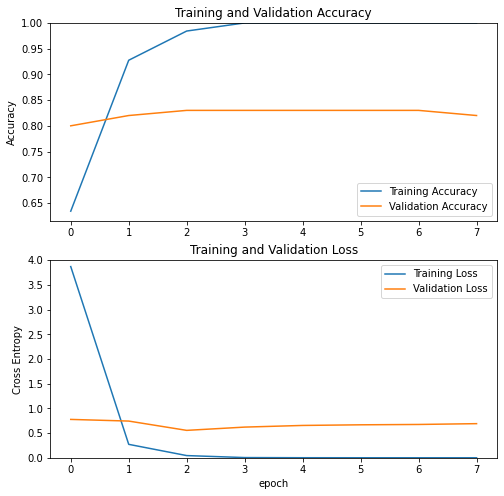

In [58]:
### Learning curves

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,4.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [55]:
### Save the model ##### ALWAYS MODIFY THE NAME BEFORE RUNNING THIS CELL
from tensorflow.keras.models import save_model

model.save('model_2')

INFO:tensorflow:Assets written to: model_2/assets


In [56]:
y_pred = model.predict(X_test, verbose=1)

3/3 [==============================] - 1s 385ms/step


In [57]:
### Print the precision and recall, among other metrics
from sklearn.metrics import classification_report

print(classification_report(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1), target_names = ['whale', 'dolphin', 'beluga'], digits=3))

              precision    recall  f1-score   support

       whale      0.854     0.946     0.897        37
     dolphin      0.926     0.862     0.893        29
      beluga      1.000     0.882     0.938        17

    accuracy                          0.904        83
   macro avg      0.927     0.897     0.909        83
weighted avg      0.909     0.904     0.904        83



### Data Augmentation